In [2]:
import numpy as np
import pandas as pd

In [30]:
df=pd.read_csv('/content/sample_data/collegePlace.csv')

In [31]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [32]:
df=df.iloc[:,3:8]
df

,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,1,8,1,1,1
1,0,7,1,1,1
2,1,6,0,0,1
3,0,8,0,1,1
4,0,8,1,0,1
...,...,...,...,...,...
2961,0,7,0,0,0
2962,1,7,1,0,0
2963,1,7,0,0,0
2964,1,7,0,0,0


In [33]:
df=df.drop(['Internships','Hostel'],axis=1)
df

,CGPA,HistoryOfBacklogs,PlacedOrNot
0,8,1,1
1,7,1,1
2,6,0,1
3,8,1,1
4,8,0,1
...,...,...,...
2961,7,0,0
2962,7,0,0
2963,7,0,0
2964,7,0,0


In [34]:
import matplotlib.pyplot as plt

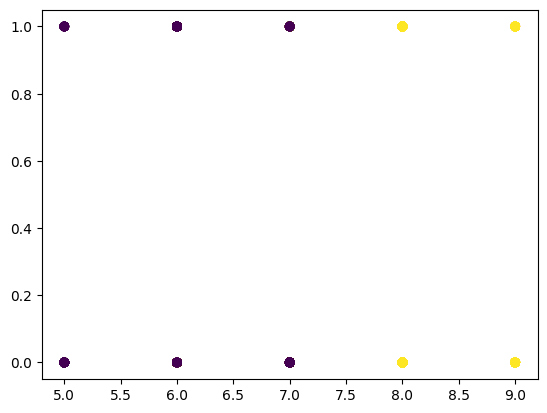

In [35]:
plt.scatter(df['CGPA'],df['HistoryOfBacklogs'],c=df['PlacedOrNot'])

In [38]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [40]:
x

,CGPA,HistoryOfBacklogs
0,8,1
1,7,1
2,6,0
3,8,1
4,8,0
...,...,...
2961,7,0
2962,7,0
2963,7,0
2964,7,0


In [42]:
y

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1
...,...
2961,0
2962,0
2963,0
2964,0


In [44]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [55]:
x_train=scaler.fit_transform(x_train)

In [57]:
x_train

array([[-1.11085235, -0.49049544],
       [ 1.99029528,  2.03875495],
       [-0.07713647, -0.49049544],
       ...,
       [-0.07713647, -0.49049544],
       [-1.11085235, -0.49049544],
       [ 1.99029528, -0.49049544]])

In [60]:
x_test=scaler.fit_transform(x_test)

In [62]:
x_test

array([[ 0.95963581, -0.47673129],
       [ 1.99228738,  2.0976177 ],
       [-1.10566734, -0.47673129],
       ...,
       [-2.13831892, -0.47673129],
       [-0.07301577, -0.47673129],
       [-0.07301577, -0.47673129]])

In [68]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf=LogisticRegression()

In [72]:
clf.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred= clf.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,y_pred)

0.6868686868686869

In [82]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

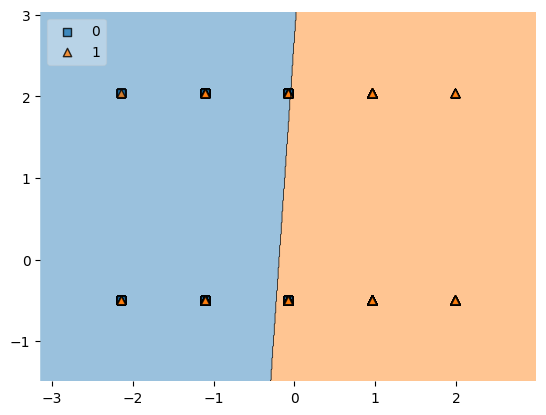

In [85]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [88]:
import pickle

In [90]:
pickle.dump(clf,open('model.pkl','wb'))